# Exercise 4.9- Intro to Data Visualization with Python

## Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Importing Data

In [5]:
path = r'C:\Users\ariel\OneDrive\Desktop\School work\08-2020 Instacart Basket Analysis'

In [6]:
path

'C:\\Users\\ariel\\OneDrive\\Desktop\\School work\\08-2020 Instacart Basket Analysis'

In [7]:
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_grouped.pkl'))

## Creating Bar Charts

<Axes: xlabel='orders_day_of_week'>

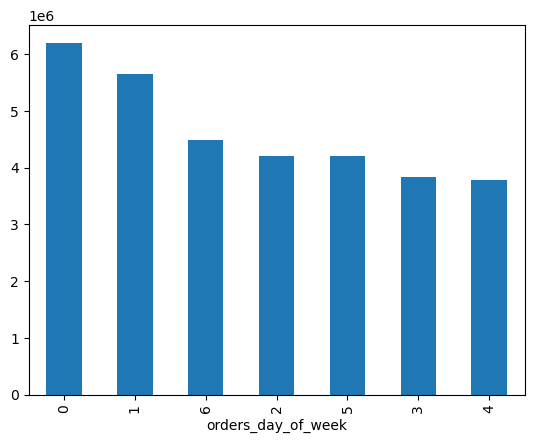

In [9]:
#Creating a bar chart for orders day of week column
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

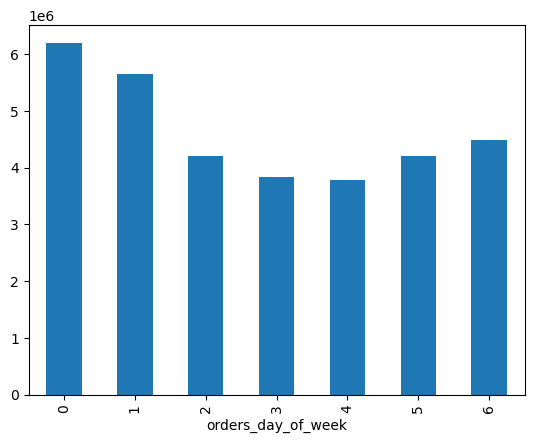

In [10]:
#Printing the bar chart in index order 
bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

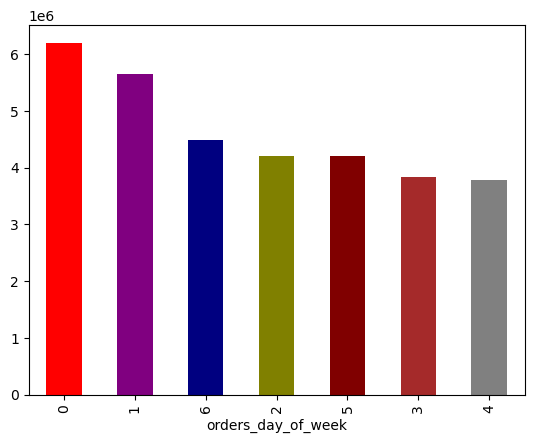

In [11]:
bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color = ['red', 'purple', 'navy', 'olive', 'maroon', 'brown', 'gray'])

## Creating Histograms and Scatterplots

<Axes: ylabel='Frequency'>

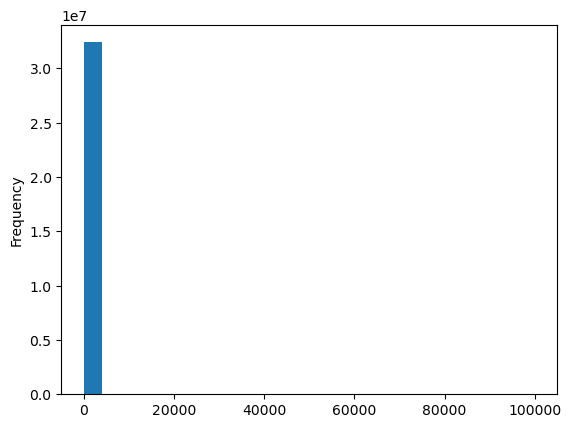

In [13]:
#Creating a hiatogram of the prices column
ords_prods_merge['prices'].plot.hist(bins = 25)

In [62]:
#Cleaning outliers-more details moved to exercise 8 notebook
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

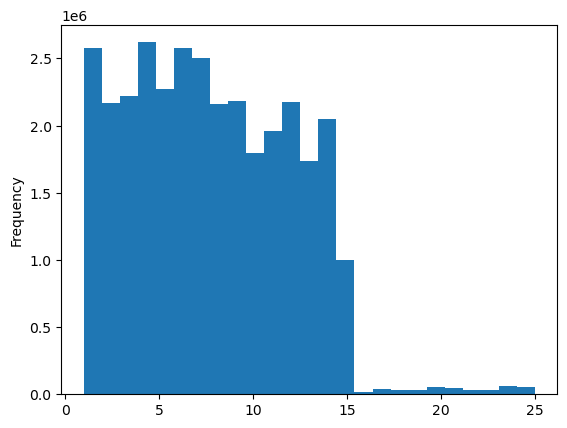

In [60]:
# Correct Histogram after revised data cleaning
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

In [15]:
#Re-Checking descriptive statistics in prices column (Histogram does not look right)
ords_prods_merge['prices'].mean()

11.980225638383468

In [16]:
ords_prods_merge['prices'].median()

7.4

In [64]:
ords_prods_merge['prices'].max()

25.0

<Axes: xlabel='prices', ylabel='prices'>

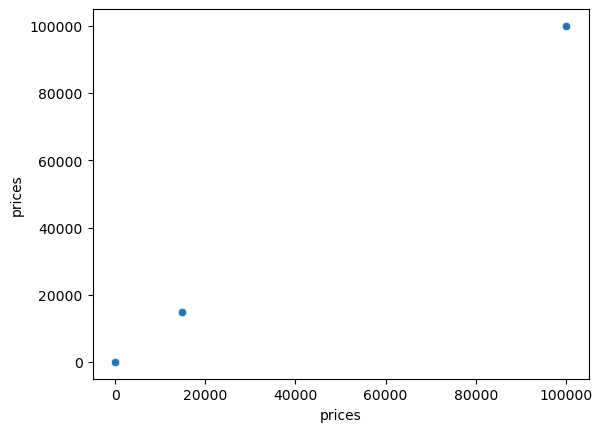

In [18]:
#Creating a scatterplot for the prices columm
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [19]:
#Investigating outliers (any price beyond $100)
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,orders_day_of_week,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_product_price,spending_flag,median_days_between_orders,order_frequency
13100147,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,912404,17,prior,12,2,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.000,Frequent customer
13100148,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,603376,17,prior,22,6,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.000,Frequent customer
13100149,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,3264360,135,prior,2,2,...,High-range product,Regularly busy,Regularly busy,Average orders,4,New customer,1154.792308,High spender,11.555,Regular customer
13100150,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,892534,135,prior,3,0,...,High-range product,Busiest day,Busiest days,Average orders,4,New customer,1154.792308,High spender,11.555,Regular customer
13100151,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,229704,342,prior,8,1,...,High-range product,Regularly busy,Busiest days,Average orders,16,Regular customer,114.426619,High spender,20.000,Regular customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21786876,33664,2 % Reduced Fat Milk,84,16,99999.0,2249946,204099,prior,29,0,...,High-range product,Busiest day,Busiest days,Average orders,39,Regular customer,1106.743956,High spender,4.000,Frequent customer
21786877,33664,2 % Reduced Fat Milk,84,16,99999.0,2363282,204099,prior,31,0,...,High-range product,Busiest day,Busiest days,Most orders,39,Regular customer,1106.743956,High spender,4.000,Frequent customer
21786878,33664,2 % Reduced Fat Milk,84,16,99999.0,3181945,204395,prior,13,3,...,High-range product,Regularly busy,Least busy days,Most orders,15,Regular customer,451.153540,High spender,5.000,Frequent customer
21786879,33664,2 % Reduced Fat Milk,84,16,99999.0,2486215,205227,prior,7,3,...,High-range product,Regularly busy,Least busy days,Average orders,12,Regular customer,1178.381871,High spender,11.110,Regular customer


In [20]:
#Marking outliers as missing values
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [21]:
ords_prods_merge['prices'].max()

25.0

## Sampling Data & Creating a line chart

In [23]:
#Creating a sample data using a 70/30 split
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [24]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [25]:
dev.shape

(32404859,)

In [26]:
#Splitting the sample data set into two samples: big and small
big = ords_prods_merge[dev]

In [27]:
small = ords_prods_merge[~dev]

In [28]:
#Create a list holding True/False values to the test np.random.rant() <= 0.7
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [29]:
#Store 70% of the sample in the dataframe big
big = ords_prods_merge[dev]

In [30]:
#Store 30% of the sample in the dataframe small
small = ords_prods_merge[~dev]

In [31]:
#Checking the new sample groups outputs together
len(ords_prods_merge)

32404859

In [32]:
len(big) + len(small)

32404859

In [33]:
#Reducing samples to only the columns necessary for the chart: prices and orders day of the week
df_2 = small[['orders_day_of_week','prices']]

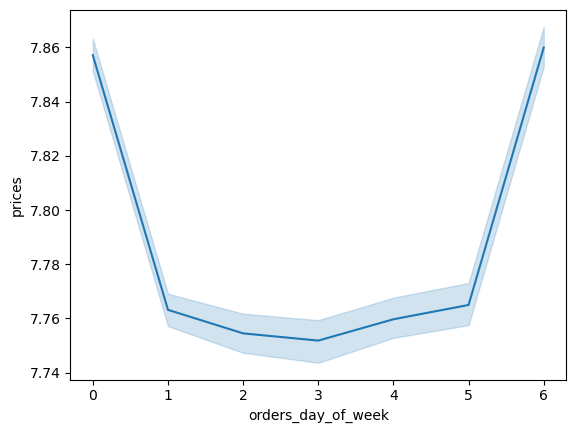

In [34]:
#Creating line chart from sample data
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

## Exporting Charts

In [36]:
#Exporting the orders dy of week bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

In [37]:
#Exporting the prices column histogram
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices.png'))

In [38]:
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_prices_ordersdow.png'))

# Task 4.9 Part 2

In [54]:
# Import most up-to-date project data
instacart = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

## #3. Provide the Instacart senior stakeholders with descriptive findings about sales - Histogram

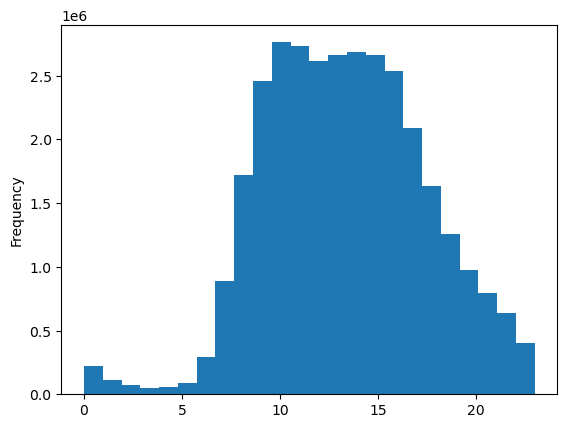

In [104]:
hist_2 = instacart['order_hour_of_day'].plot.hist(bins = 24)

In [66]:
instacart['order_hour_of_day'].mode()

0    10
Name: order_hour_of_day, dtype: int64

In [68]:
instacart['order_hour_of_day'].median()

13.0

In [70]:
instacart['order_hour_of_day'].max()

23

10:00 a.m is the busiest time of the day with the highest frequency of sales. The busy time is from 10:00 a.m to 3:00 p.m, and then frequency of sales steadily drops.

## #4. Distribution of orders among customers in terms of loyalty

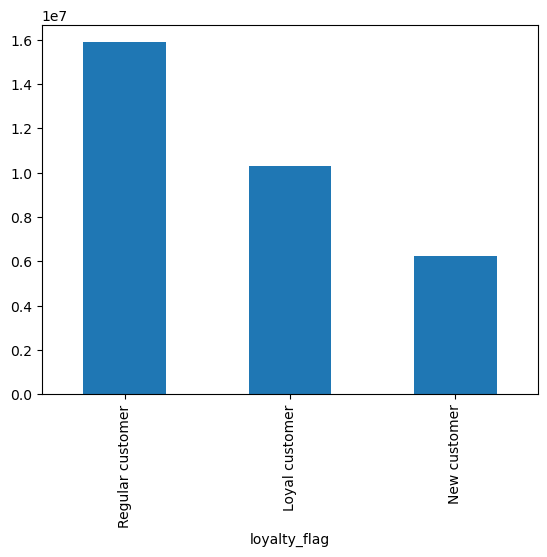

In [106]:
bar_2 = instacart['loyalty_flag'].value_counts().plot.bar()

## #5. Is there a difference in expenditure depending on the hour of day?

In [79]:
# Create a random sample by generating a seed
np.random.seed(4)

In [81]:
# Create a dev list based on the data split we want (70/30)
dev = np.random.rand(len(instacart)) <= 0.7

In [83]:
# Split the dataframe into two samples
big = instacart[dev]
small = instacart[~dev]

In [85]:
# Compare the dataframe length to the sum of the big and small samples
len(instacart)

32404859

In [87]:
len(big) + len(small)

32404859

In [89]:
# Reduce the samples to only the columns needed
instacart_2 = small [['order_hour_of_day','prices']]

In [91]:
instacart_2.head()

,order_hour_of_day,prices
0,11,5.8
2,21,5.8
3,13,5.8
6,14,5.8
10,11,5.8


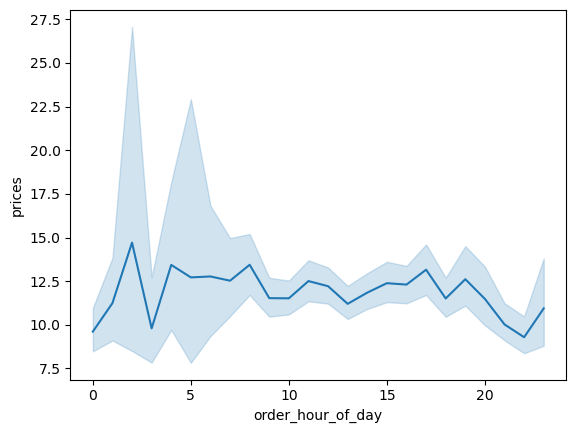

In [111]:
line_2 = sns.lineplot(data = instacart_2, x = 'order_hour_of_day',y = 'prices')

Not much difference in expenditure based on time of day.

## #6. Exploring customer demographics for targeted marketing: Is there a connection between age and family situation?

In [97]:
# Reduce previously made sample to only the columns needed
instacart_3 = small [['age','n_dependants']]

In [99]:
instacart_3.head()

,age,n_dependants
0,81,1
2,66,2
3,40,3
6,20,3
10,61,1


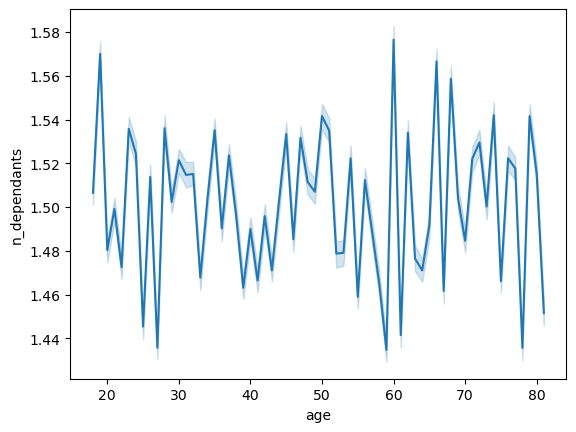

In [108]:
# Create a line chart
line_3 = sns.lineplot(data = instacart_3, x = 'age',y = 'n_dependants')

No specific age group as a whole stands out when it comes to a relationship between age and number of dependants.

## #7. Exploring customer demographics: Is there a connection between age and spending power (income)?

In [114]:
# Reduce previously made sample to only the columns needed
instacart_4 = small [['age','income']]

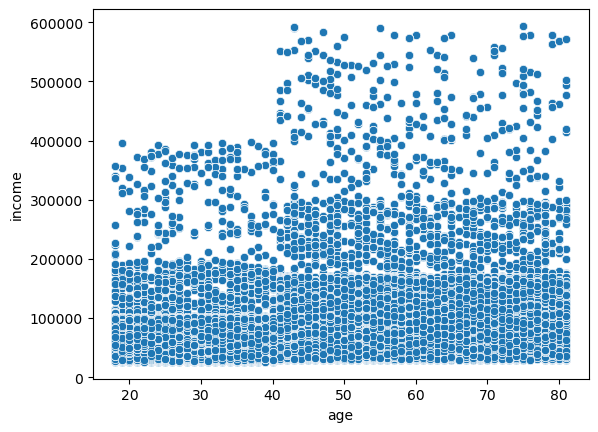

In [116]:
# Create a scatterplot
scatterplot_2 = sns.scatterplot(x = 'age', y = 'income',data = instacart_4)

There is a more frequent spending power among middle aged (45 years old) customers and up.

## Export Visualizations

In [120]:
hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'sales_orderhourofday.png'))

In [122]:
bar_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_flag.png'))

In [124]:
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'prices_hourofday.png'))

In [126]:
line_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_numof_depend.png'))

In [128]:
scatterplot_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'spending_power.png'))